In [6]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer    # Tensorflow un Tokenizer fonksiyonu
from tensorflow.keras.preprocessing.sequence import pad_sequences    # modele vereceğimiz squence lerin aynı boyutta olmasını sağlıyor.
pd.set_option('display.max_columns', None)


In [8]:
data = pd.read_csv('alzheimers_disease_data.csv')
data.sample(1)


,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
1042,5793,62,1,3,0,16.522671,0,10.353125,9.300418,8.16548,9.535771,0,0,0,1,0,0,176,79,208.062911,58.561343,63.602391,54.564326,5.901941,0.482852,0,0,1.016881,0,0,0,0,1,1,XXXConfid


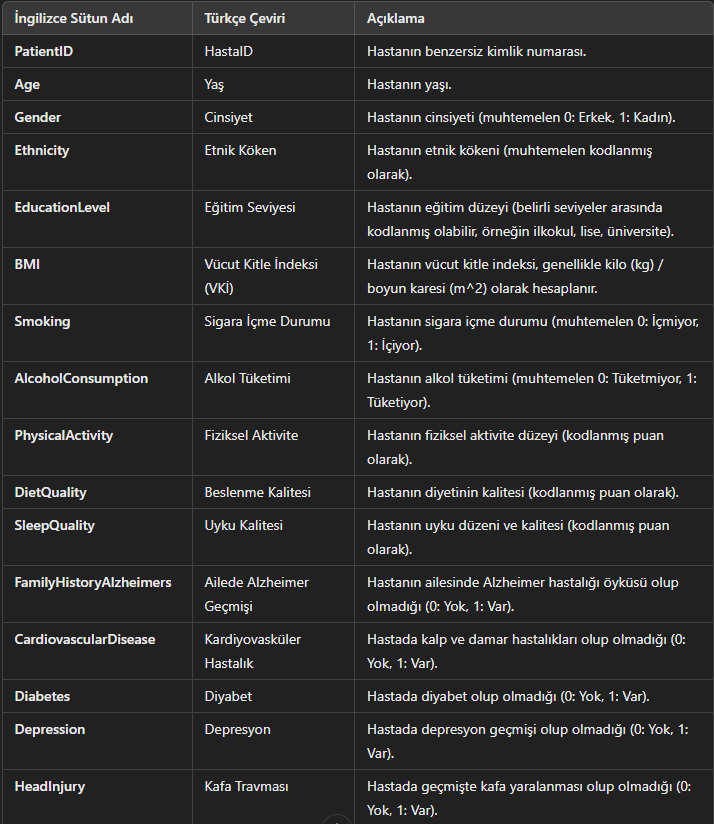

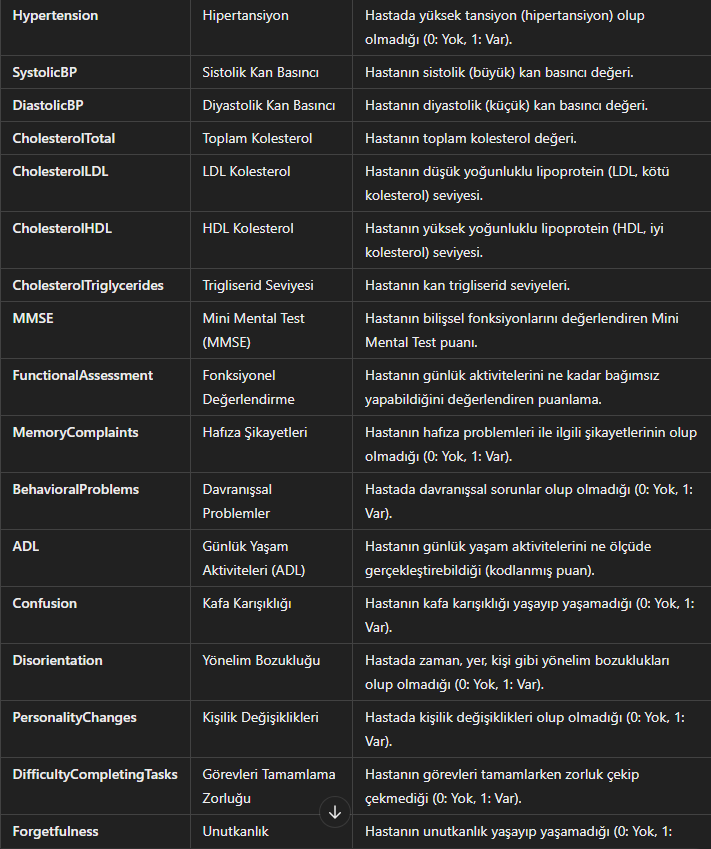

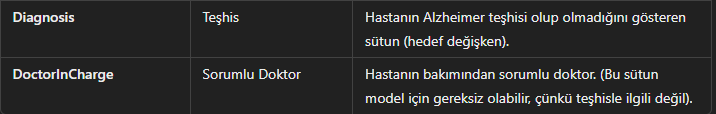

In [29]:
# İngilizce ve Türkçe sütun isimlerini eşleyen bir sözlük oluştur
column_mapping = {
    "PatientID": "HastaID",
    "Age": "Yaş",
    "Gender": "Cinsiyet",
    "Ethnicity": "EtnikKöken",
    "EducationLevel": "EğitimSeviyesi",
    "BMI": "VücutKitleİndeksi",
    "Smoking": "SigaraDurumu",
    "AlcoholConsumption": "AlkolTüketimi",
    "PhysicalActivity": "FizikselAktivite",
    "DietQuality": "BeslenmeKalitesi",
    "SleepQuality": "UykuKalitesi",
    "FamilyHistoryAlzheimers": "AiledeAlzheimerGeçmişi",
    "CardiovascularDisease": "KardiyovaskülerHastalık",
    "Diabetes": "Diyabet",
    "Depression": "Depresyon",
    "HeadInjury": "KafaTravması",
    "Hypertension": "Hipertansiyon",
    "SystolicBP": "SistolikKanBasıncı",
    "DiastolicBP": "DiyastolikKanBasıncı",
    "CholesterolTotal": "ToplamKolesterol",
    "CholesterolLDL": "LDLKolesterol",
    "CholesterolHDL": "HDLKolesterol",
    "CholesterolTriglycerides": "TrigliseridSeviyesi",
    "MMSE": "MiniMentalTest",
    "FunctionalAssessment": "FonksiyonelDeğerlendirme",
    "MemoryComplaints": "HafızaŞikayetleri",
    "BehavioralProblems": "DavranışsalProblemler",
    "ADL": "GünlükYaşamAktiviteleri",
    "Confusion": "KafaKarışıklığı",
    "Disorientation": "YönelimBozukluğu",
    "PersonalityChanges": "KişilikDeğişiklikleri",
    "DifficultyCompletingTasks": "GörevTamamlamaZorluğu",
    "Forgetfulness": "Unutkanlık",
    "Diagnosis": "Teşhis",
    "DoctorInCharge": "SorumluDoktor"
}

data.rename(columns=column_mapping, inplace=True)




In [30]:
data.head(3)

,HastaID,Yaş,Cinsiyet,EtnikKöken,EğitimSeviyesi,VücutKitleİndeksi,SigaraDurumu,AlkolTüketimi,FizikselAktivite,BeslenmeKalitesi,UykuKalitesi,AiledeAlzheimerGeçmişi,KardiyovaskülerHastalık,Diyabet,Depresyon,KafaTravması,Hipertansiyon,SistolikKanBasıncı,DiyastolikKanBasıncı,ToplamKolesterol,LDLKolesterol,HDLKolesterol,TrigliseridSeviyesi,MiniMentalTest,FonksiyonelDeğerlendirme,HafızaŞikayetleri,DavranışsalProblemler,GünlükYaşamAktiviteleri,KafaKarışıklığı,YönelimBozukluğu,KişilikDeğişiklikleri,GörevTamamlamaZorluğu,Unutkanlık,Teşhis,SorumluDoktor
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,0,0,1,1,0,0,142,72,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,0,0,0,0,0,0,115,64,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,1,0,0,0,0,0,99,116,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,0,0,7.119548,0,1,0,1,0,0,XXXConfid


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   HastaID                   2149 non-null   int64  
 1   Yaş                       2149 non-null   int64  
 2   Cinsiyet                  2149 non-null   int64  
 3   EtnikKöken                2149 non-null   int64  
 4   EğitimSeviyesi            2149 non-null   int64  
 5   VücutKitleİndeksi         2149 non-null   float64
 6   SigaraDurumu              2149 non-null   int64  
 7   AlkolTüketimi             2149 non-null   float64
 8   FizikselAktivite          2149 non-null   float64
 9   BeslenmeKalitesi          2149 non-null   float64
 10  UykuKalitesi              2149 non-null   float64
 11  AiledeAlzheimerGeçmişi    2149 non-null   int64  
 12  KardiyovaskülerHastalık   2149 non-null   int64  
 13  Diyabet                   2149 non-null   int64  
 14  Depresyo

In [32]:
# Veri setinin genel bir profilini elde etmek için
# Gözlem sayısı-veri tipi-null değer sayısı-unique değer sayısı-min-max değerleri
# null değerler "0" gözüküyor!

def summary(data, pred=None):
    
    print(" "*11,"İNFO")
    print("-"*30)
    print()

    a =data.isnull().sum()[data.isnull().sum()>0]
    if a.empty:
        print("Data Setinde NULL DEĞER YOK")
    else:
        print(a)
    print()
    print("-"*30)
    print()
    obs = data.shape[0]
    Types = data.dtypes
    Counts = data.apply(lambda x: x.count())
    Min = data.min()
    Max = data.max()
    Uniques = data.apply(lambda x: x.unique().shape[0])
    Nulls = data.apply(lambda x: x.isnull().sum())
    print('Data shape:', data.shape)

    if pred is None:
        cols = ['Types', 'Counts', 'Uniques', 'Nulls', 'Min', 'Max']
        str = pd.concat([Types, Counts, Uniques, Nulls, Min, Max], axis = 1, sort=True)

    str.columns = cols
    print('___________________________\nData Types:')
    print(str.Types.value_counts())
    print()

    print('___________________________')
    return str

summary(data)

            İNFO
------------------------------

Data Setinde NULL DEĞER YOK

------------------------------

Data shape: (2149, 35)
___________________________
Data Types:
Types
int64      22
float64    12
object      1
Name: count, dtype: int64

___________________________


,Types,Counts,Uniques,Nulls,Min,Max
AiledeAlzheimerGeçmişi,int64,2149,2,0,0,1
AlkolTüketimi,float64,2149,2149,0,0.002003,19.989293
BeslenmeKalitesi,float64,2149,2149,0,0.009385,9.998346
Cinsiyet,int64,2149,2,0,0,1
DavranışsalProblemler,int64,2149,2,0,0,1
Depresyon,int64,2149,2,0,0,1
Diyabet,int64,2149,2,0,0,1
DiyastolikKanBasıncı,int64,2149,60,0,60,119
EtnikKöken,int64,2149,4,0,0,3
EğitimSeviyesi,int64,2149,4,0,0,3


In [33]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
HastaID,2149.0,5825.000000,620.507185,4751.000000,5288.000000,5825.000000,6362.000000,6899.000000
Yaş,2149.0,74.908795,8.990221,60.000000,67.000000,75.000000,83.000000,90.000000
Cinsiyet,2149.0,0.506282,0.500077,0.000000,0.000000,1.000000,1.000000,1.000000
EtnikKöken,2149.0,0.697534,0.996128,0.000000,0.000000,0.000000,1.000000,3.000000
EğitimSeviyesi,2149.0,1.286645,0.904527,0.000000,1.000000,1.000000,2.000000,3.000000
VücutKitleİndeksi,2149.0,27.655697,7.217438,15.008851,21.611408,27.823924,33.869778,39.992767
SigaraDurumu,2149.0,0.288506,0.453173,0.000000,0.000000,0.000000,1.000000,1.000000
AlkolTüketimi,2149.0,10.039442,5.757910,0.002003,5.139810,9.934412,15.157931,19.989293
FizikselAktivite,2149.0,4.920202,2.857191,0.003616,2.570626,4.766424,7.427899,9.987429
BeslenmeKalitesi,2149.0,4.993138,2.909055,0.009385,2.458455,5.076087,7.558625,9.998346


In [49]:
data.drop(columns=["SorumluDoktor"], axis = 1, inplace = True)

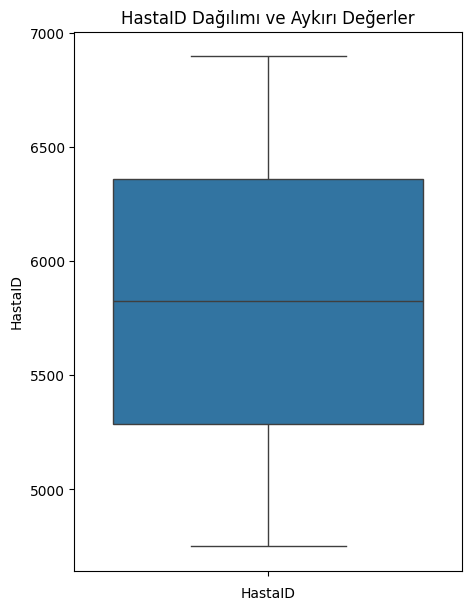

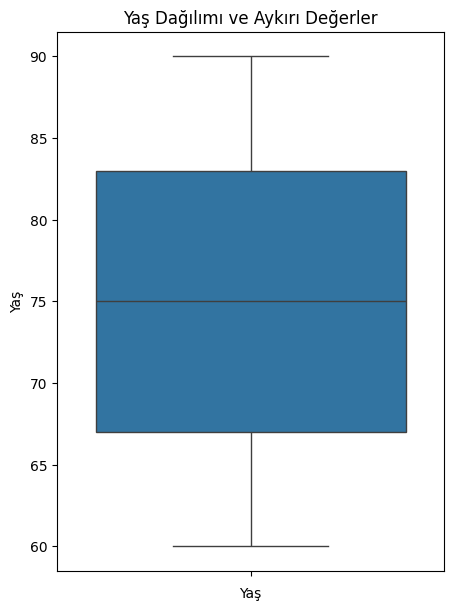

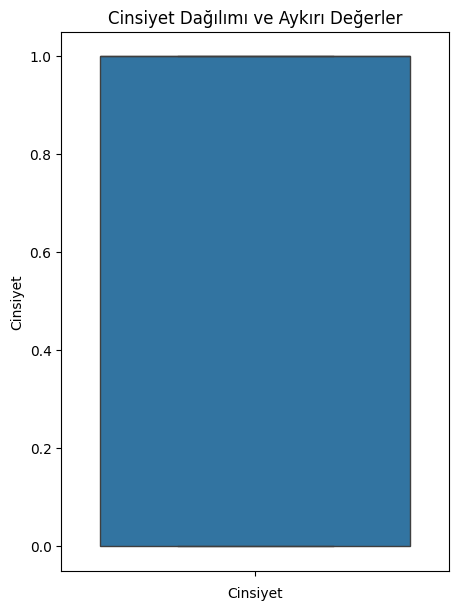

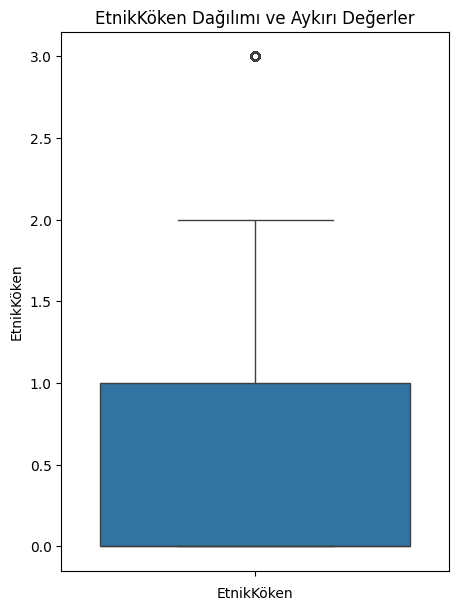

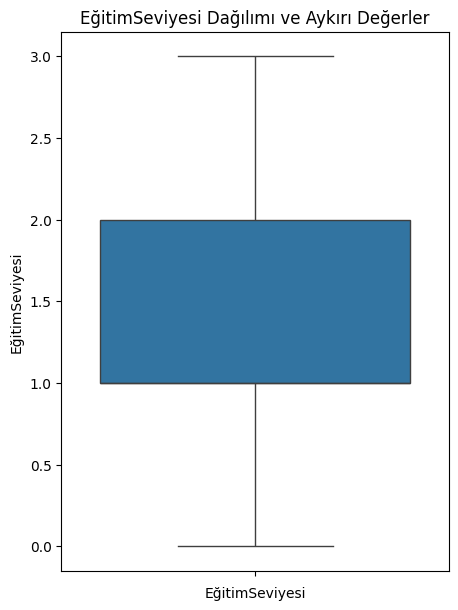

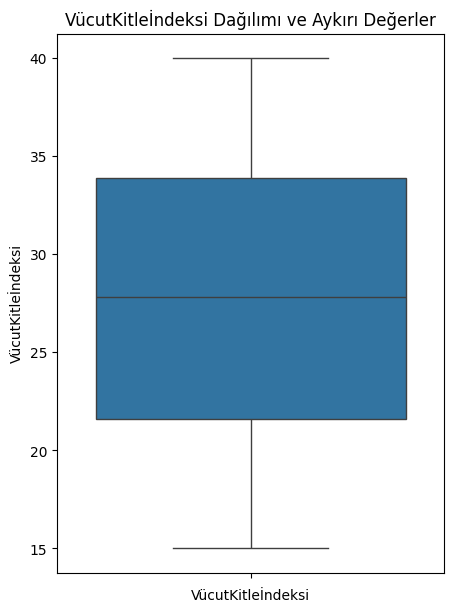

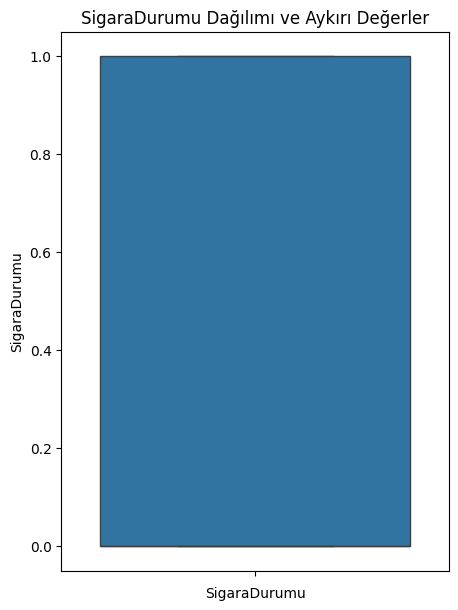

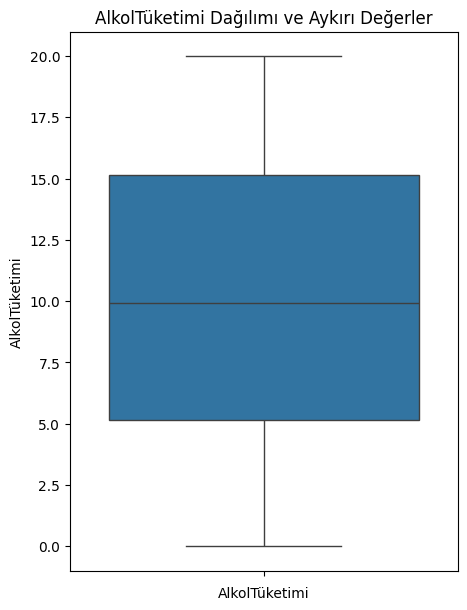

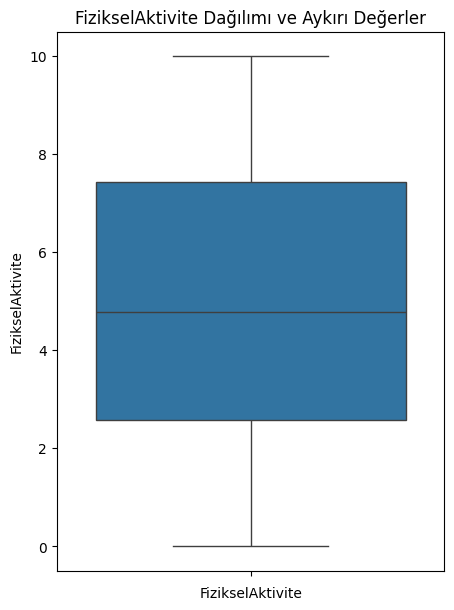

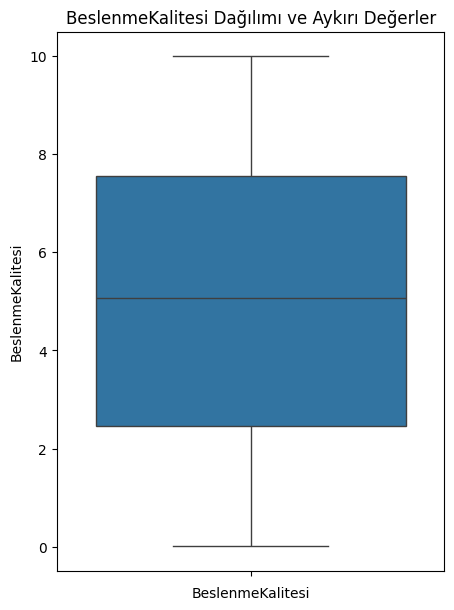

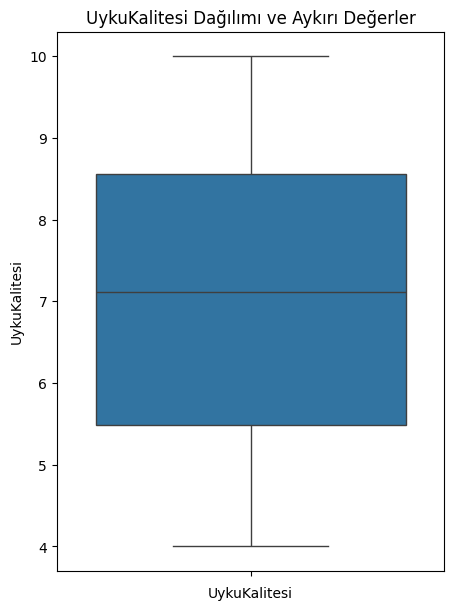

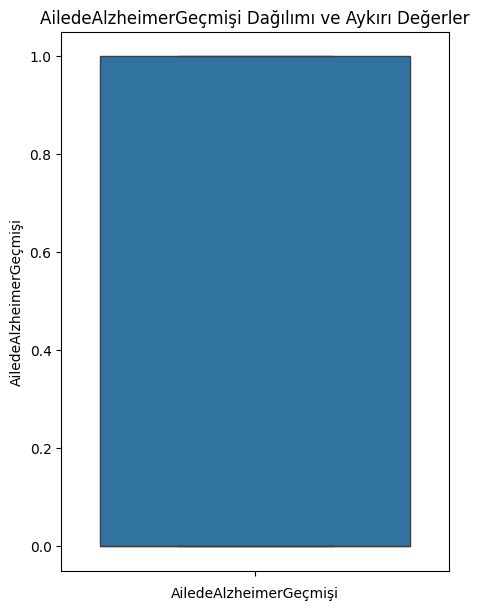

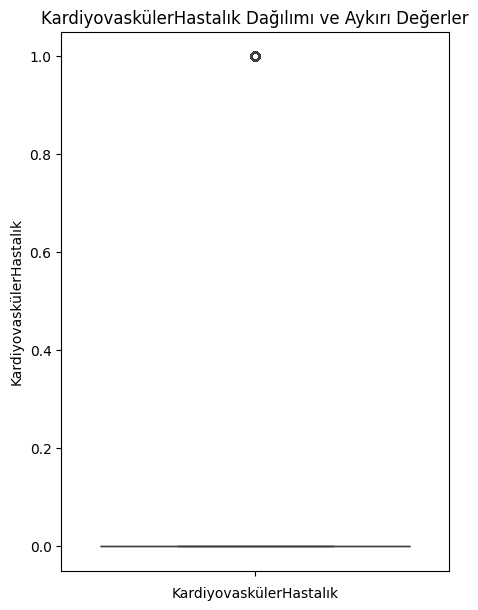

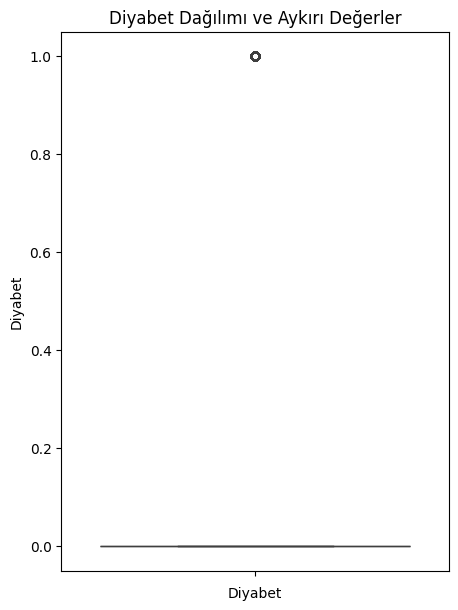

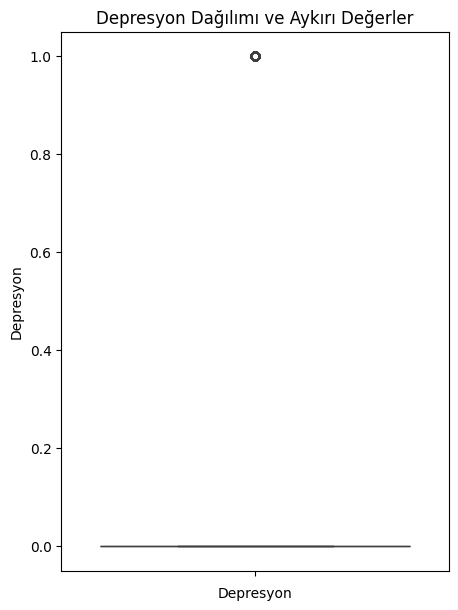

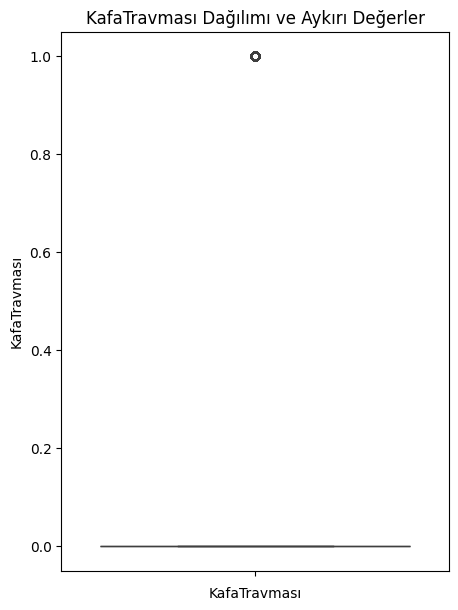

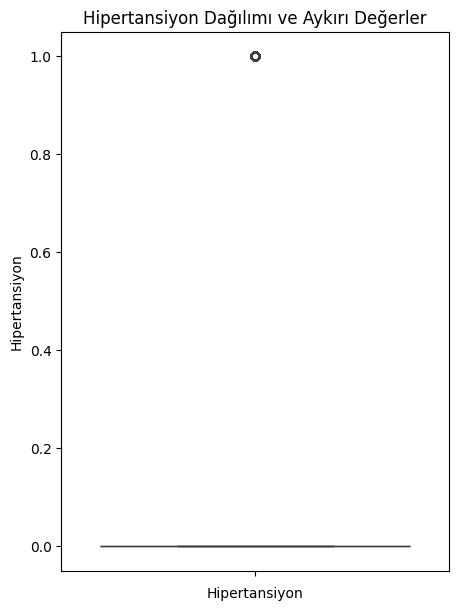

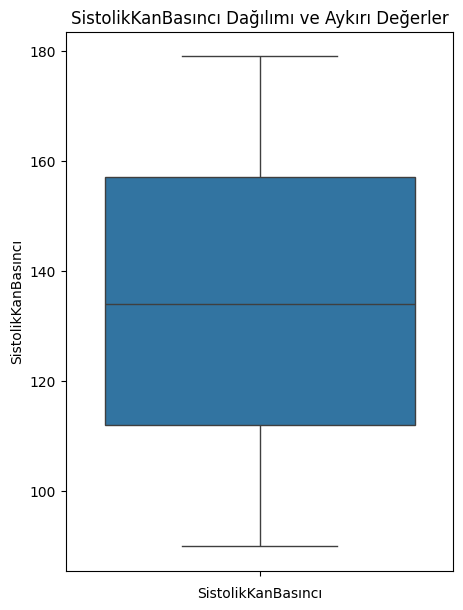

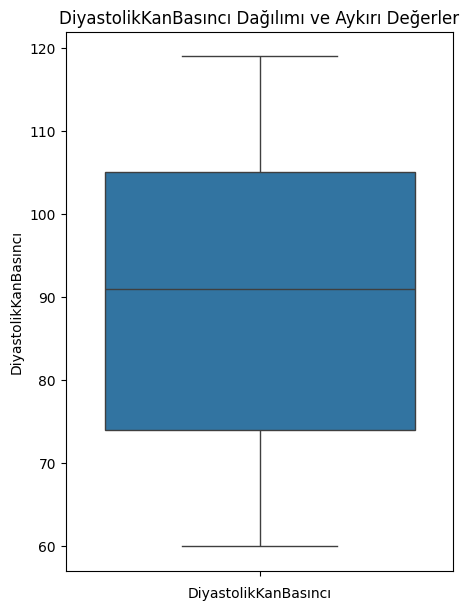

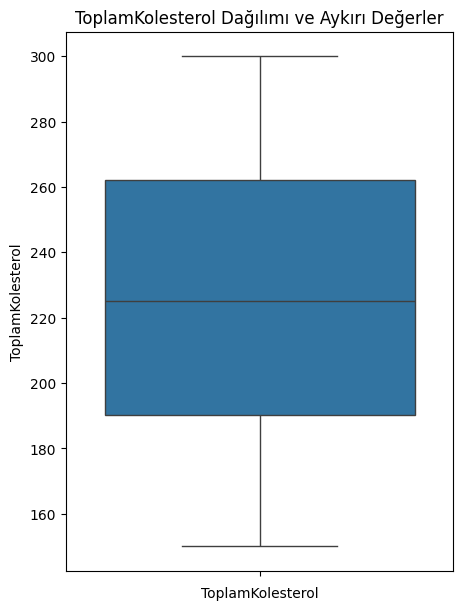

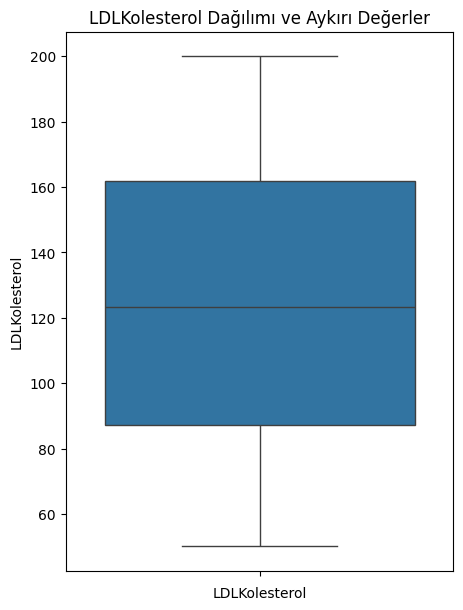

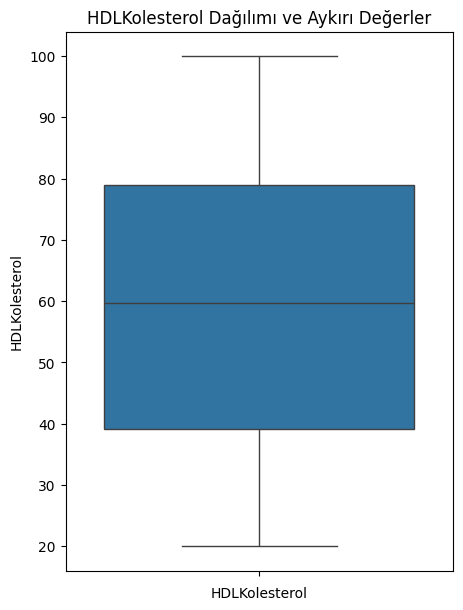

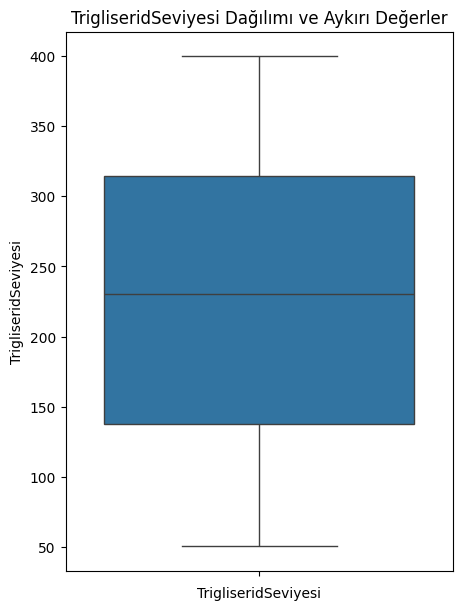

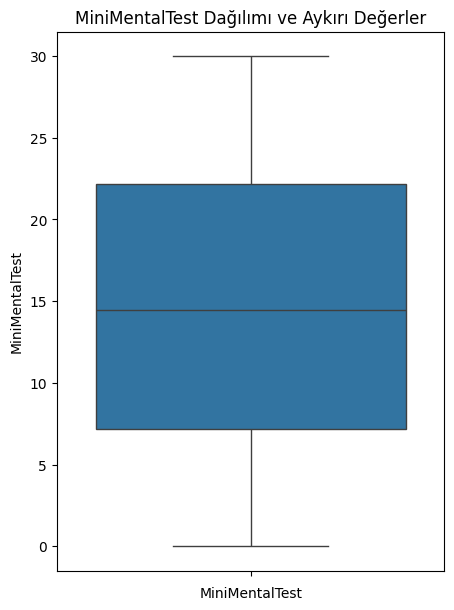

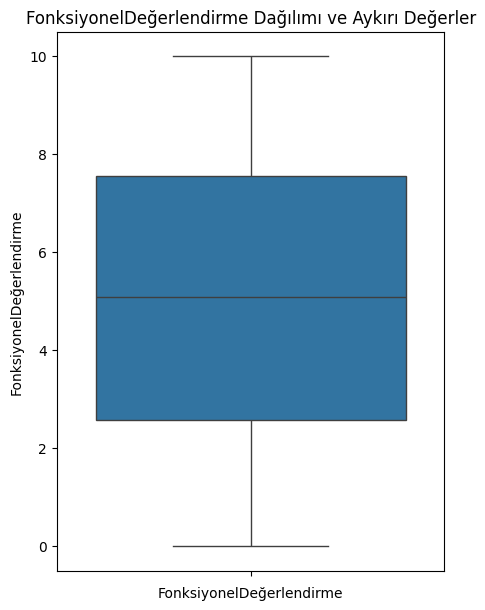

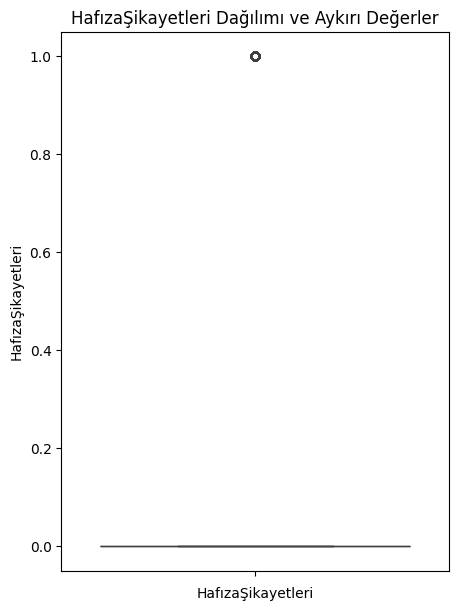

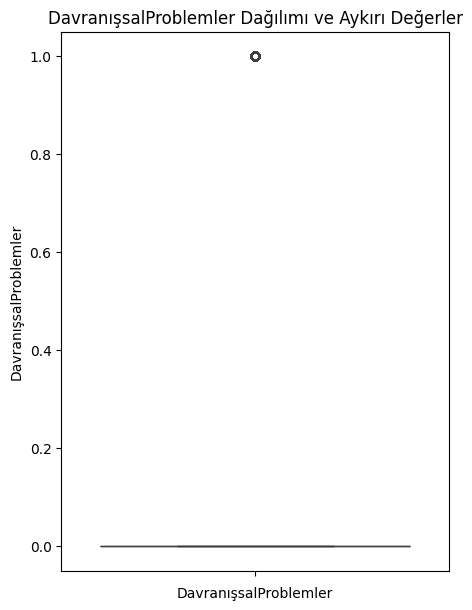

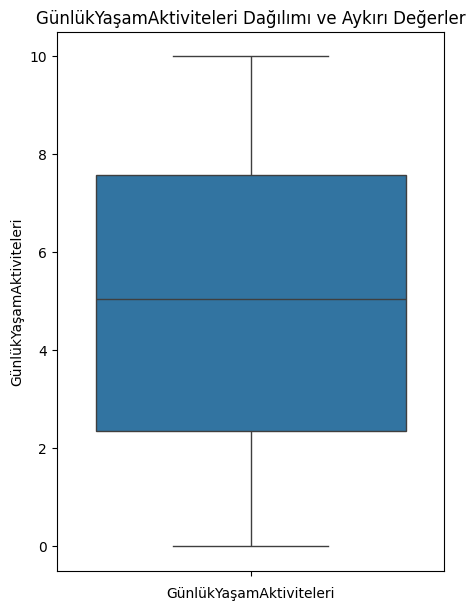

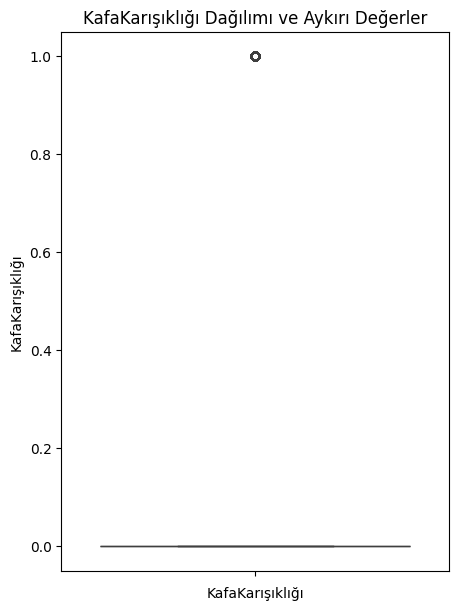

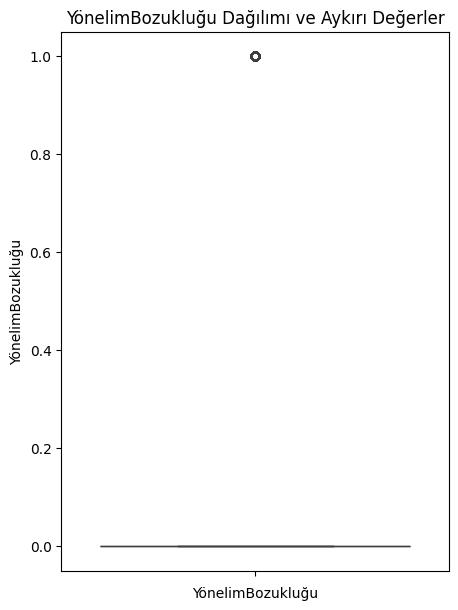

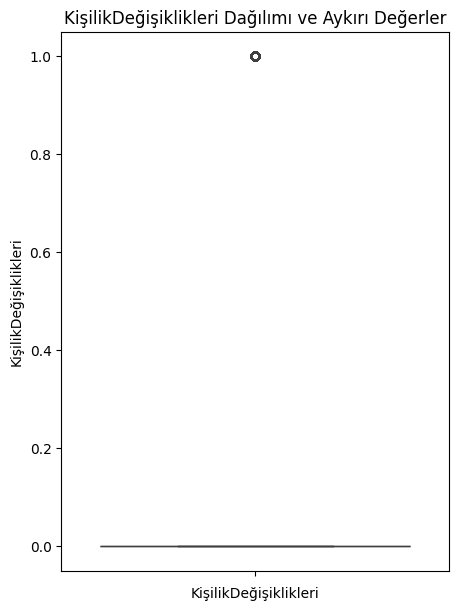

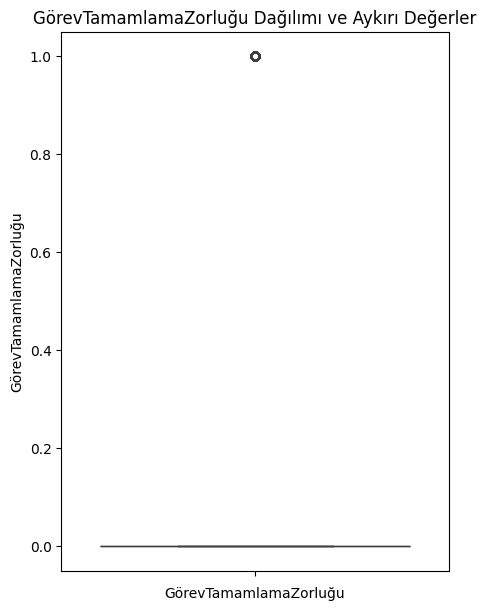

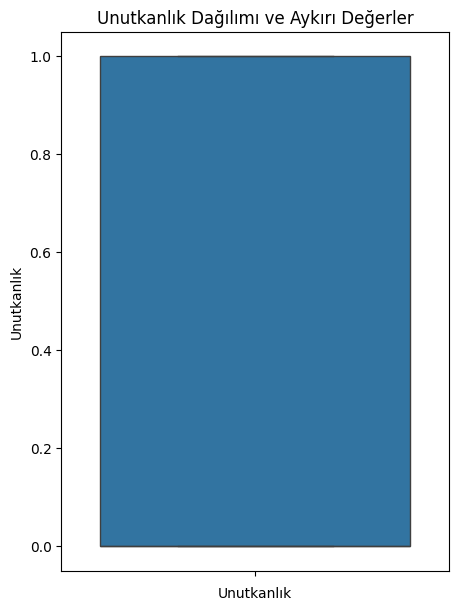

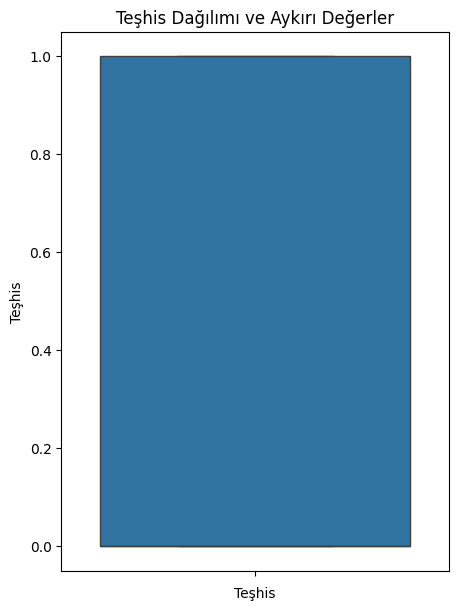

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_boxplots(data):
    # Sayısal sütunları seçme
    numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
    
    # Her sayısal sütun için box plot oluşturma
    for column in numeric_columns:
        plt.figure(figsize=(5, 7))
        sns.boxplot(y=data[column])
        plt.title(f'{column} Dağılımı ve Aykırı Değerler')
        plt.xlabel(column)
        plt.show()

# Fonksiyonu çağırma
plot_boxplots(data)


C:\Users\tr_co\AppData\Local\Temp\ipykernel_14788\1204456534.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=data[column], palette='viridis')  # 'viridis' renk paleti


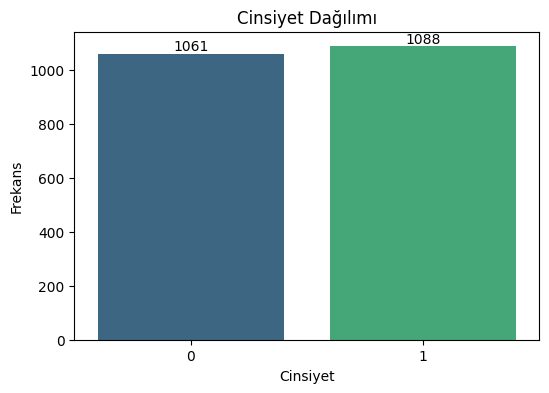

C:\Users\tr_co\AppData\Local\Temp\ipykernel_14788\1204456534.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=data[column], palette='viridis')  # 'viridis' renk paleti


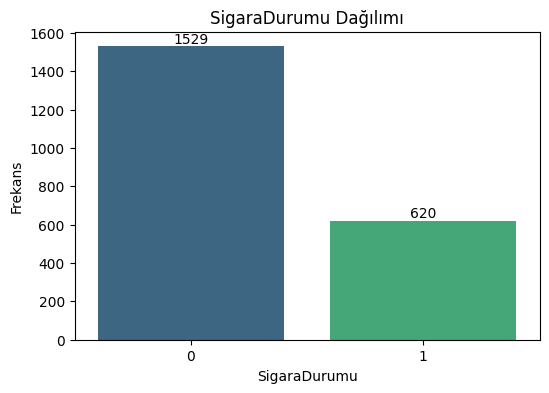

C:\Users\tr_co\AppData\Local\Temp\ipykernel_14788\1204456534.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=data[column], palette='viridis')  # 'viridis' renk paleti


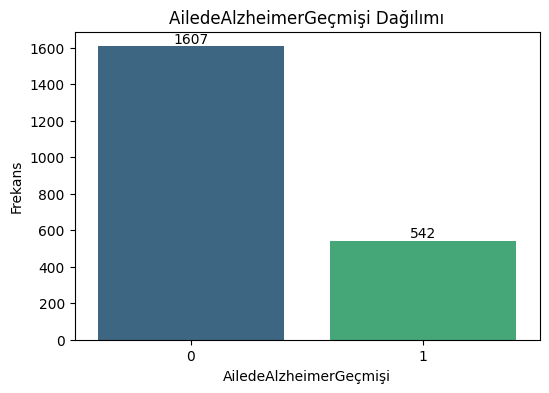

C:\Users\tr_co\AppData\Local\Temp\ipykernel_14788\1204456534.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=data[column], palette='viridis')  # 'viridis' renk paleti


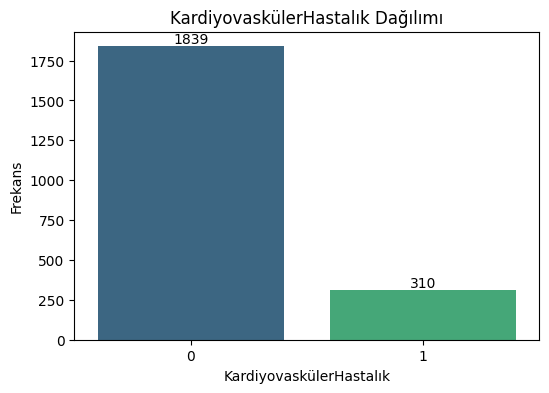

C:\Users\tr_co\AppData\Local\Temp\ipykernel_14788\1204456534.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=data[column], palette='viridis')  # 'viridis' renk paleti


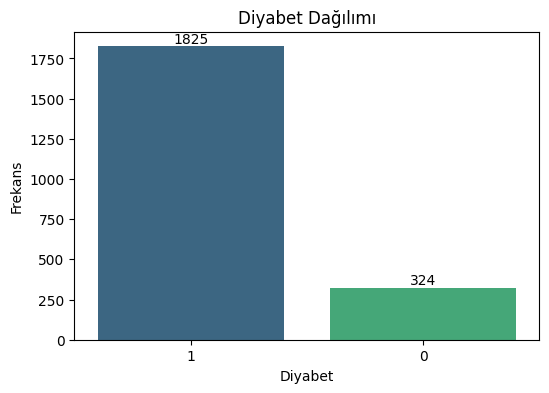

C:\Users\tr_co\AppData\Local\Temp\ipykernel_14788\1204456534.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=data[column], palette='viridis')  # 'viridis' renk paleti


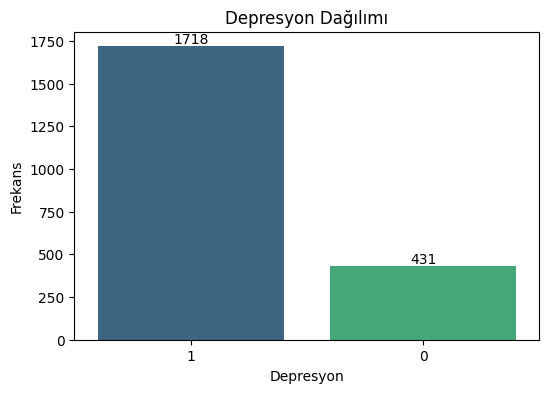

C:\Users\tr_co\AppData\Local\Temp\ipykernel_14788\1204456534.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=data[column], palette='viridis')  # 'viridis' renk paleti


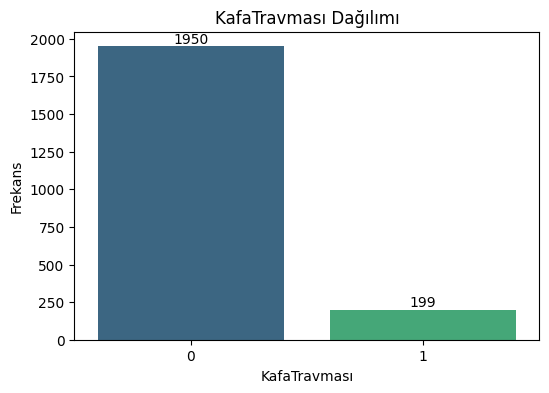

C:\Users\tr_co\AppData\Local\Temp\ipykernel_14788\1204456534.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=data[column], palette='viridis')  # 'viridis' renk paleti


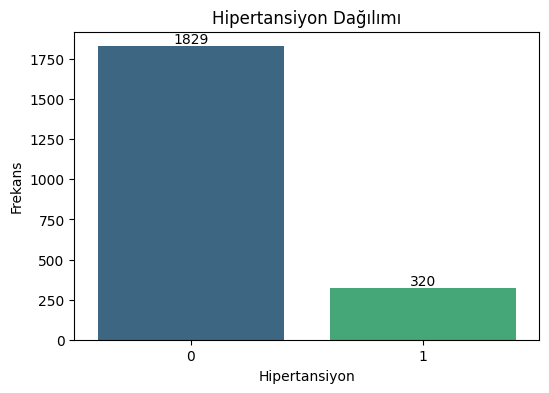

C:\Users\tr_co\AppData\Local\Temp\ipykernel_14788\1204456534.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=data[column], palette='viridis')  # 'viridis' renk paleti


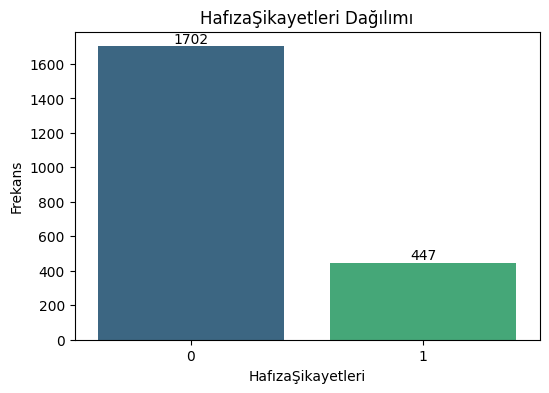

C:\Users\tr_co\AppData\Local\Temp\ipykernel_14788\1204456534.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=data[column], palette='viridis')  # 'viridis' renk paleti


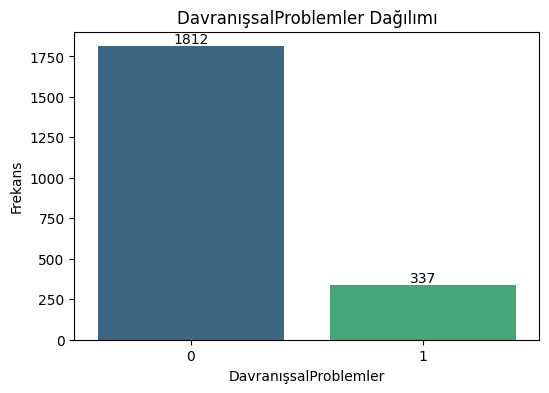

C:\Users\tr_co\AppData\Local\Temp\ipykernel_14788\1204456534.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=data[column], palette='viridis')  # 'viridis' renk paleti


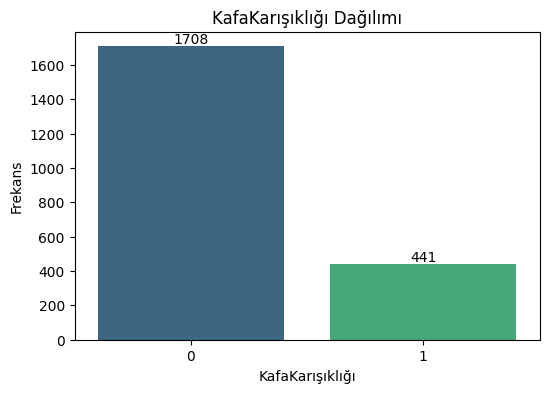

C:\Users\tr_co\AppData\Local\Temp\ipykernel_14788\1204456534.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=data[column], palette='viridis')  # 'viridis' renk paleti


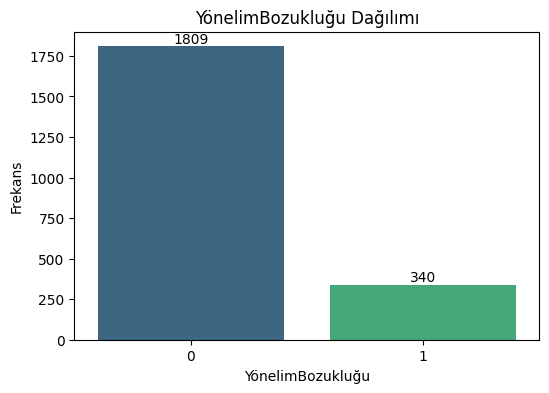

C:\Users\tr_co\AppData\Local\Temp\ipykernel_14788\1204456534.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=data[column], palette='viridis')  # 'viridis' renk paleti


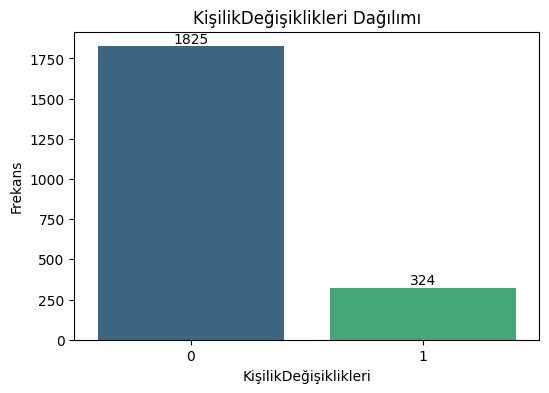

C:\Users\tr_co\AppData\Local\Temp\ipykernel_14788\1204456534.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=data[column], palette='viridis')  # 'viridis' renk paleti


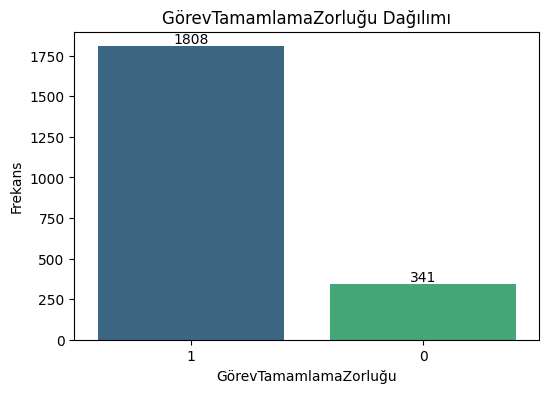

C:\Users\tr_co\AppData\Local\Temp\ipykernel_14788\1204456534.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=data[column], palette='viridis')  # 'viridis' renk paleti


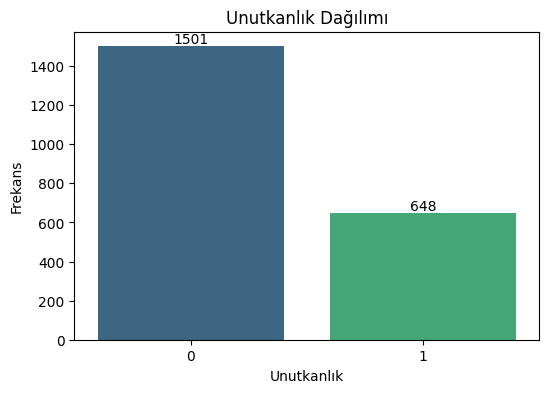

C:\Users\tr_co\AppData\Local\Temp\ipykernel_14788\1204456534.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=data[column], palette='viridis')  # 'viridis' renk paleti


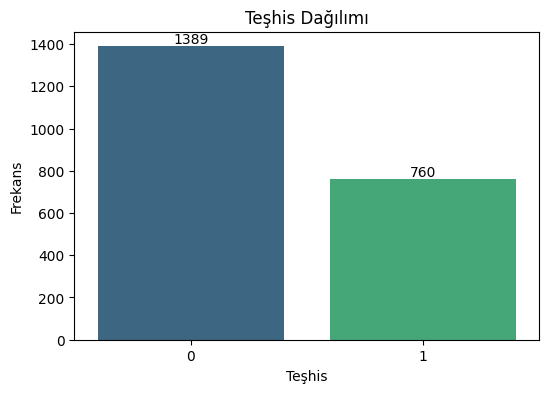

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_bar_for_binary_columns(data):
    # Sadece iki unique değere sahip sütunları seçme
    binary_columns = [col for col in data.columns if data[col].nunique() == 2]
    
    # Her bir sütun için bar grafiği oluşturma
    for column in binary_columns:
        plt.figure(figsize=(6, 4))
        ax = sns.countplot(x=data[column], palette='viridis')  # 'viridis' renk paleti
        plt.title(f'{column} Dağılımı')
        plt.xlabel(column)
        plt.ylabel('Frekans')
        plt.xticks(ticks=[0, 1], labels=data[column].unique())  # X eksenindeki değerleri ayarla
        
        # Barların üzerine frekans değerlerini yazma
        for p in ax.patches:
            ax.annotate(f'{int(p.get_height())}', 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='bottom')

        plt.show()

# Fonksiyonu çağırma
plot_bar_for_binary_columns(data)
